In [95]:
#Import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge


In [96]:
 
Bike_Sharing_hour= pd.read_csv('/Users/nataliemac/Desktop/VCS/Python/05_Capital_Bike_Share/Bike-Sharing-Dataset/hour.csv')

Bike_Sharing_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [97]:

#Change column names:
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'dteday': 'date'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hr': 'hour'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'mnth': 'month'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'yr': 'year'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'cnt': 'total'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'weathersit': 'weather'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hum': 'humidity'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'casual': 'non_member'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'registered': 'member'})




Bike_Sharing_hour.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


#Check correlation between target dependent variables and the independent variables

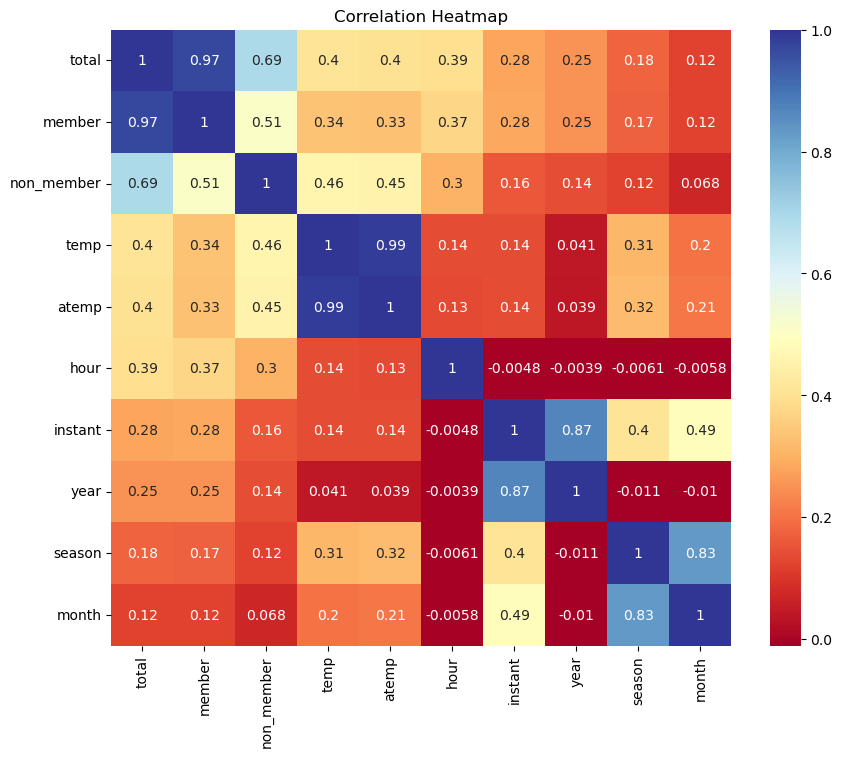

In [98]:
# calculate the correlations between each variable and the "quality" variable
correlations = Bike_Sharing_hour.corr()['total']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# Get the top 10 variables with the highest correlation to quality
top_correlations = sorted_correlations[:10]

# Extract the correlation matrix for the top variables
top_variables = Bike_Sharing_hour[top_correlations.index]
correlation_matrix = top_variables.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()


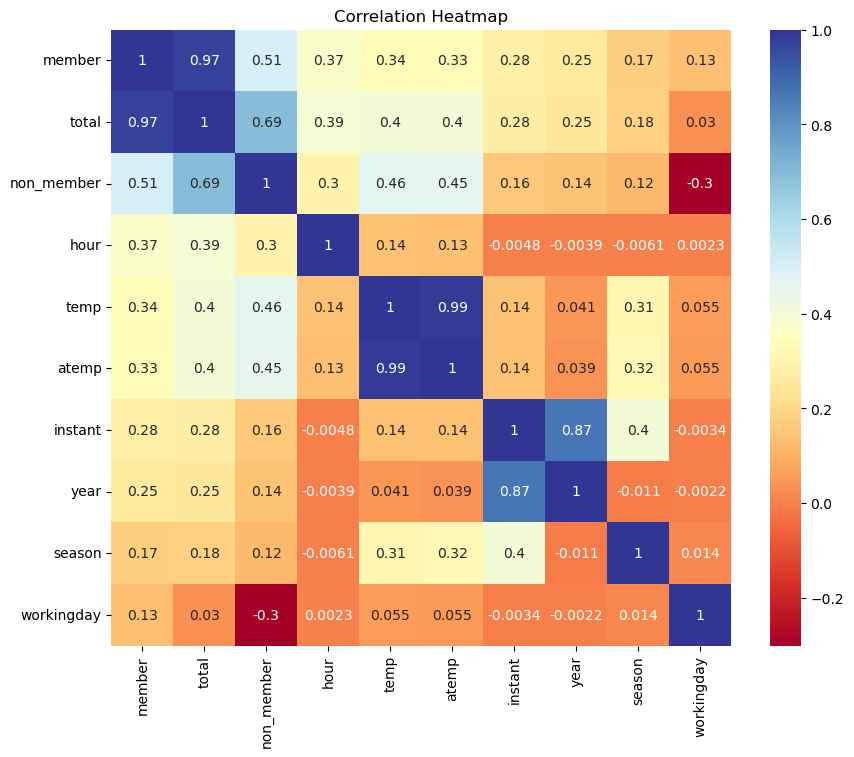

In [99]:
# calculate the correlations between each variable and the "quality" variable
correlations = Bike_Sharing_hour.corr()['member']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# Get the top 10 variables with the highest correlation to quality
top_correlations = sorted_correlations[:10]

# Extract the correlation matrix for the top variables
top_variables = Bike_Sharing_hour[top_correlations.index]
correlation_matrix = top_variables.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()


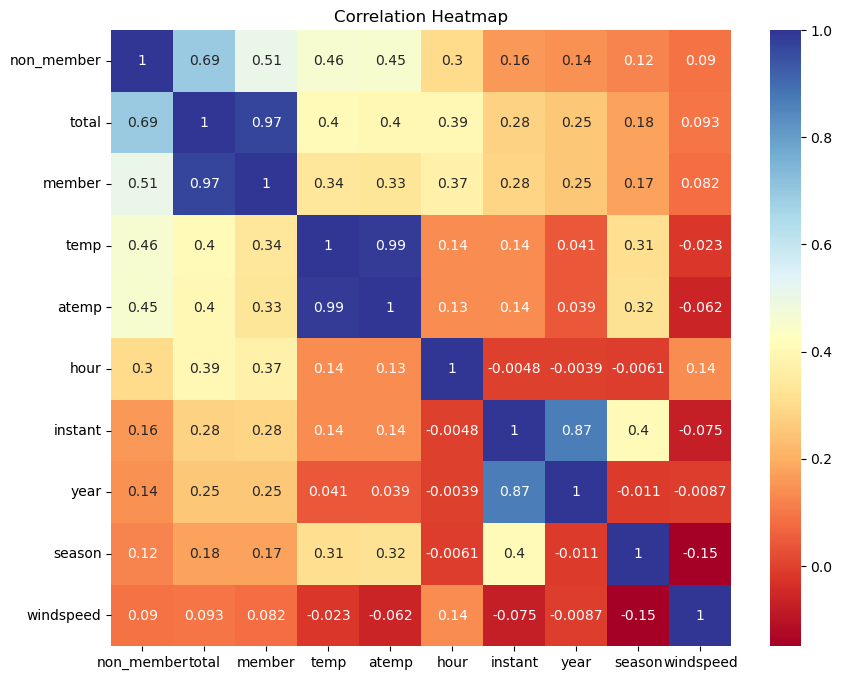

In [100]:
# calculate the correlations between each variable and the "quality" variable
correlations = Bike_Sharing_hour.corr()['non_member']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# Get the top 10 variables with the highest correlation to quality
top_correlations = sorted_correlations[:10]

# Extract the correlation matrix for the top variables
top_variables = Bike_Sharing_hour[top_correlations.index]
correlation_matrix = top_variables.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()


In [101]:


# Calculate the correlation matrix
correlation_matrix = Bike_Sharing_hour.corr()

# Extract the correlation values for the 'total' variable
correlation_with_total = correlation_matrix['total']

# Print the correlations
print(correlation_with_total)



instant       0.278379
season        0.178056
year          0.250495
month         0.120638
hour          0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weather      -0.142426
temp          0.404772
atemp         0.400929
humidity     -0.322911
windspeed     0.093234
non_member    0.694564
member        0.972151
total         1.000000
Name: total, dtype: float64


In [102]:


# Calculate the correlation matrix
correlation_matrix = Bike_Sharing_hour.corr()

# Extract the correlation values for the 'total' variable
correlation_with_total = correlation_matrix['member']

# Print the correlations
print(correlation_with_total)


instant       0.282046
season        0.174226
year          0.253684
month         0.122273
hour          0.374141
holiday      -0.047345
weekday       0.021578
workingday    0.134326
weather      -0.120966
temp          0.335361
atemp         0.332559
humidity     -0.273933
windspeed     0.082321
non_member    0.506618
member        1.000000
total         0.972151
Name: member, dtype: float64


In [103]:

# Calculate the correlation matrix
correlation_matrix = Bike_Sharing_hour.corr()

# Extract the correlation values for the 'total' variable
correlation_with_total = correlation_matrix['non_member']

# Print the correlations
print(correlation_with_total)


instant       0.158295
season        0.120206
year          0.142779
month         0.068457
hour          0.301202
holiday       0.031564
weekday       0.032721
workingday   -0.300942
weather      -0.152628
temp          0.459616
atemp         0.454080
humidity     -0.347028
windspeed     0.090287
non_member    1.000000
member        0.506618
total         0.694564
Name: non_member, dtype: float64


# MLM Regression

#Info about models

Random Forest Regression: RandomForestRegressor from scikit-learn. This algorithm is an ensemble method that combines multiple decision trees to make predictions.

Gradient Boosting Regression: GradientBoostingRegressor from scikit-learn. This algorithm builds an ensemble of weak prediction models (typically decision trees) in a stage-wise manner, where each new model corrects the mistakes of the previous ones.

Support Vector Regression: SVR from scikit-learn. This algorithm uses support vector machines to perform regression tasks. It can handle non-linear relationships between the features and the target variable.

K-Nearest Neighbors Regression: KNeighborsRegressor from scikit-learn. This algorithm predicts the target variable based on the average of the values of its k nearest neighbors in the feature space.

Neural Network Regression: MLPRegressor from scikit-learn. This algorithm represents a multi-layer perceptron neural network for regression tasks. It can capture complex relationships between the features and the target variable.
 

In [104]:
# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models


# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")



Random Forest Regression:
R2 Score: 0.8302416273560437
MSE: 5375.468697578381
MAE: 47.33351809997556

Gradient Boosting Regression:
R2 Score: 0.7986293727318108
MSE: 6376.483743527523
MAE: 55.040874151092005

Support Vector Regression:
R2 Score: 0.3422933557827197
MSE: 20826.551427860777
MAE: 91.77467444043631

K-Nearest Neighbors Regression:
R2 Score: 0.7984773946808861
MSE: 6381.296191024167
MAE: 52.39384349827388

Neural Network Regression:
R2 Score: 0.5689305909609813
MSE: 13649.990151783844
MAE: 80.46508318705447

Linear Regression:
R2 Score: 0.3426737120422856
MSE: 20814.50729044723
MAE: 106.94738942340375

Decision Tree Regression:
R2 Score: 0.7261497602433079
MSE: 8671.58048648295
MAE: 58.33650268507864

Bayesian Ridge Regression:
R2 Score: 0.34265428271709064
MSE: 20815.122528021515
MAE: 106.94652857696141

Random Forest Regression: 0.8302416273560437
Gradient Boosting Regression: 0.7986293727318108
K-Nearest Neighbors Regression: 0.7984773946808861
Decision Tree Regression: 0

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models


# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append(acc)
    names.append(name)
    msg = "%s: %f" % (name, acc)
    print(msg)        

# Plot the accuracy results of the models using seaborn boxplots
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names, rotation=90)

plt.show()

# Evaluate the models using a confusion matrix, mean squared error, mean absolute error, mean squared log error, and r2 score

for name, model in models:
    model.fit(X_train, y_train)
    y



Random Forest Regression:
R2 Score: 0.830793491023145
MSE: 5357.993707557971
MAE: 47.34064186988532

Gradient Boosting Regression:
R2 Score: 0.7986293727318108
MSE: 6376.483743527521
MAE: 55.040874151092005

Support Vector Regression:
R2 Score: 0.3422933557827197
MSE: 20826.551427860777
MAE: 91.77467444043631

K-Nearest Neighbors Regression:
R2 Score: 0.7984773946808861
MSE: 6381.296191024167
MAE: 52.39384349827388



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regression:
R2 Score: 0.56777965931894
MSE: 13686.434875649224
MAE: 79.4329284659524

Linear Regression:
R2 Score: 0.3426737120422856
MSE: 20814.50729044723
MAE: 106.94738942340375

Decision Tree Regression:
R2 Score: 0.7283794942116275
MSE: 8600.975043205237
MAE: 58.14655734560798

Bayesian Ridge Regression:
R2 Score: 0.34265428271709064
MSE: 20815.122528021515
MAE: 106.94652857696141

Random Forest Regression: 0.830793491023145
Gradient Boosting Regression: 0.7986293727318108
K-Nearest Neighbors Regression: 0.7984773946808861
Decision Tree Regression: 0.7283794942116275
Neural Network Regression: 0.56777965931894
Linear Regression: 0.3426737120422856
Bayesian Ridge Regression: 0.34265428271709064
Support Vector Regression: 0.3422933557827197


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets


Based on the R2 score, mean squared error (MSE), and mean absolute 
The Random Forest Regression model has the highest R2 score, indicating better performance in explaining the variance in the target variable. It also has the lowest MSE and MAE values, suggesting better accuracy in predicting the target variable.


In [ ]:
# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.8375979586196742
MSE: 373.1696988169713
MAE: 10.831594976681355

Gradient Boosting Regression:
R2 Score: 0.7891716209010302
MSE: 484.44441992072075
MAE: 12.82526460602944

Support Vector Regression:
R2 Score: 0.3646730771719864
MSE: 1459.8631545943401
MAE: 20.138785974715454

K-Nearest Neighbors Regression:
R2 Score: 0.7600327005472243
MSE: 551.400241657077
MAE: 12.671288837744532

Neural Network Regression:
R2 Score: 0.7231713579813659
MSE: 636.1007539559146
MAE: 14.841338101611763

Linear Regression:
R2 Score: 0.4447455610203287
MSE: 1275.871473041299
MAE: 24.055080207217

Decision Tree Regression:
R2 Score: 0.7074571902010847
MSE: 672.2089900832791
MAE: 14.161057455203025

Bayesian Ridge Regression:
R2 Score: 0.4447355705897521
MSE: 1275.894429193436
MAE: 24.05174229385279

Random Forest Regression: 0.8375979586196742
Gradient Boosting Regression: 0.7891716209010302
K-Nearest Neighbors Regression: 0.7600327005472243
Neural Network Regression: 0.

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#The R2 score represents the proportion of variance in the target variable that is predictable from the features. Higher values closer to 1 indicate a better fit.

The MSE (Mean Squared Error) measures the average squared difference between the predicted and actual values. Lower values indicate better accuracy.

The MAE (Mean Absolute Error) measures the average absolute difference between the predicted and actual values. Lower values indicate better accuracy.

The R2 score ranges between 0 and 1. A score of 0 indicates that the model fails to explain any of the variability in the target variable, while a score of 1 indicates a perfect fit where the model can explain all the variability. In practice, R2 scores close to 1 are considered better, indicating a higher proportion of the target variable's variance being explained by the model.

In the provided results, the R2 scores range from 0.0267 to 0.1859. These scores suggest that the models explain between 2.67% and 18.59% of the variance in the number of bike rides per day based on the given features. While the scores are relatively low, it's important to interpret them in the context of the specific problem and the available data.

In [ ]:
# Fit the Random Forest Regression model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Print the feature importance values
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")


season: 0.025567884118693426
holiday: 0.007520030418802893
workingday: 0.1992586125939319
weather: 0.014648884858349847
temp: 0.2547161909082195
hour: 0.39284465907369265
humidity: 0.10544373802830981


features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']


In [ ]:
# Fit the Random Forest Regression model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a dictionary to store feature importance values
feature_importance_dict = {}

# Assign feature importance values to corresponding feature names
for feature, importance in zip(features, feature_importances):
    feature_importance_dict[feature] = importance

# Sort the feature importance dictionary in descending order of importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance values for all features
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


hour: 0.39243397911615135
temp: 0.25543220345373213
workingday: 0.20006824734091996
humidity: 0.10403947971480988
season: 0.025472745774574097
weather: 0.014945685535627758
holiday: 0.007607659064184762


In [ ]:

# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.8394335665602346
MSE: 368.9518130286961
MAE: 10.817442152688127

Feature Importance:
hour: 0.39367901466999855
temp: 0.2550261429099568
workingday: 0.20005459040016235
humidity: 0.10351330828258214
season: 0.025473551521873188
weather: 0.014677395784972364
holiday: 0.0075759964304546465


Gradient Boosting Regression:
R2 Score: 0.7891716209010301
MSE: 484.44441992072086
MAE: 12.82526460602944

Feature Importance:
hour: 0.363431090483643
workingday: 0.29693162342951246
temp: 0.25675939417939
humidity: 0.06751706838369582
season: 0.007986562948822249
weather: 0.005377866802484409
holiday: 0.0019963937724521343


Support Vector Regression:
R2 Score: 0.3646730771719864
MSE: 1459.8631545943401
MAE: 20.138785974715454

K-Nearest Neighbors Regression:
R2 Score: 0.7600327005472243
MSE: 551.400241657077
MAE: 12.671288837744532

Neural Network Regression:
R2 Score: 0.7241373547711888
MSE: 633.8810729220278
MAE: 14.93740714892181

Linear Regression:
R2 Score:

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.8171424216955213
MSE: 4036.429689492937
MAE: 40.086341658213925

Feature Importance:
hour: 0.5841840279778986
temp: 0.13367142624406378
workingday: 0.120890724568108
humidity: 0.08534189128186553
season: 0.043114914766857346
weather: 0.02932066507017376
holiday: 0.003476350091033083


Gradient Boosting Regression:
R2 Score: 0.7925201249951481
MSE: 4579.946509230105
MAE: 46.441467223468756

Feature Importance:
hour: 0.7115874340033388
workingday: 0.13876923645825512
temp: 0.07962538933860544
season: 0.04070250391627297
humidity: 0.0162235812894629
weather: 0.012960195130880797
holiday: 0.00013165986318400543


Support Vector Regression:
R2 Score: 0.27011667789403293
MSE: 16111.5702096231
MAE: 75.77939345530025

K-Nearest Neighbors Regression:
R2 Score: 0.794028118389355
MSE: 4546.658803222094
MAE: 43.656616800920595

Neural Network Regression:
R2 Score: 0.486816586111663
MSE: 11328.099098660601
MAE: 71.147649257669

Linear Regression:
R2 Score: 0.28

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.8325642959590256
MSE: 5301.920440866686
MAE: 47.06283159263381

Feature Importance:
hour: 0.6091093743245346
temp: 0.1758430299873134
humidity: 0.08539002426940769
workingday: 0.06034302565254501
season: 0.036972186130173196
weather: 0.028347379924574305
holiday: 0.003994979711451871


Gradient Boosting Regression:
R2 Score: 0.7986293727318108
MSE: 6376.483743527523
MAE: 55.040874151092005

Feature Importance:
hour: 0.662419432559887
temp: 0.1487649552804044
workingday: 0.11051274118001649
season: 0.03282269445635137
humidity: 0.030225088766630513
weather: 0.014862828770854052
holiday: 0.0003922589858561604


Support Vector Regression:
R2 Score: 0.3422933557827197
MSE: 20826.551427860777
MAE: 91.77467444043631

K-Nearest Neighbors Regression:
R2 Score: 0.7984773946808861
MSE: 6381.296191024167
MAE: 52.39384349827388

Neural Network Regression:
R2 Score: 0.5370179003818949
MSE: 14660.51862582368
MAE: 88.08715185882711

Linear Regression:
R2 Score: 0

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Remove 'holiday'
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.8248161091498685
MSE: 402.540012616174
MAE: 11.123915663546274

Feature Importance:
hour: 0.39572410787760093
temp: 0.25628715817466635
workingday: 0.19918195423593102
humidity: 0.10691569105062781
season: 0.02637780043111639
weather: 0.015513288230057515


Gradient Boosting Regression:
R2 Score: 0.7869227302320361
MSE: 489.6119525852608
MAE: 12.895973305969115

Feature Importance:
hour: 0.36063807792187047
workingday: 0.300005175676381
temp: 0.25801293583760343
humidity: 0.06837052510252324
season: 0.007711565842289022
weather: 0.0052617196193326995


Support Vector Regression:
R2 Score: 0.3689249218304378
MSE: 1450.0932060325786
MAE: 20.058530773562556

K-Nearest Neighbors Regression:
R2 Score: 0.7428208854607814
MSE: 590.9497928653625
MAE: 12.919735327963176

Neural Network Regression:
R2 Score: 0.7222544059749598
MSE: 638.2077391954583
MAE: 14.955804268182344

Linear Regression:
R2 Score: 0.44461346308915806
MSE: 1276.1750095287123
MAE: 24.0464

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Remove 'holiday'
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models



# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.8121083113658784
MSE: 4147.553508276751
MAE: 40.789052352087886

Feature Importance:
hour: 0.5870521449932274
temp: 0.13562153110157008
workingday: 0.11858878003862312
humidity: 0.0872006835392614
season: 0.04241601966279348
weather: 0.029120840664524507


Gradient Boosting Regression:
R2 Score: 0.7924889701791433
MSE: 4580.634226006508
MAE: 46.45887165484046

Feature Importance:
hour: 0.7116436455515915
workingday: 0.13883632860493078
temp: 0.0796298960382311
season: 0.040705537170664934
humidity: 0.01622370047205943
weather: 0.012960892162522213


Support Vector Regression:
R2 Score: 0.27031908164829
MSE: 16107.102314277861
MAE: 75.64489776003354

K-Nearest Neighbors Regression:
R2 Score: 0.7912089256452308
MSE: 4608.890149597239
MAE: 44.04338319907941

Neural Network Regression:
R2 Score: 0.47597728124020655
MSE: 11567.367781983969
MAE: 72.90149794206944

Linear Regression:
R2 Score: 0.28190761882474524
MSE: 15851.294947962702
MAE: 90.8334433593

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#remove 'holiday'
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")



Random Forest Regression:
R2 Score: 0.824634185028839
MSE: 5553.030665414773
MAE: 48.15258346159339

Feature Importance:
hour: 0.6101561915381807
temp: 0.17800240440994075
humidity: 0.08757098062781393
workingday: 0.058606334332398875
season: 0.0372511384048184
weather: 0.028412950686847377


Gradient Boosting Regression:
R2 Score: 0.7968460783192436
MSE: 6432.952494635465
MAE: 55.415472042664746

Feature Importance:
hour: 0.6638886084688594
temp: 0.1498511626495416
workingday: 0.10897211311946693
season: 0.03258362975068854
humidity: 0.02988018949795592
weather: 0.014824296513487599


Support Vector Regression:
R2 Score: 0.34410619627717765
MSE: 20769.14708791638
MAE: 91.50688614032413

K-Nearest Neighbors Regression:
R2 Score: 0.7930367964717988
MSE: 6553.574971231301
MAE: 53.10316455696203

Neural Network Regression:
R2 Score: 0.5589969030699792
MSE: 13964.544464940405
MAE: 80.6899353387623

Linear Regression:
R2 Score: 0.34260914459415626
MSE: 20816.55184525119
MAE: 106.94223139364

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Regression:
R2 Score: 0.8256523737086869
MSE: 5520.789302049267
MAE: 47.8292895504157

Feature Importance:
hour: 0.6080140404945378
temp: 0.17750987850619435
humidity: 0.0868944205807042
workingday: 0.06138610131671979
season: 0.037396912988895935
weather: 0.028798646112947995


Gradient Boosting Regression:
R2 Score: 0.7968460783192436
MSE: 6432.952494635465
MAE: 55.41547204266474

Feature Importance:
hour: 0.6638886084688604
temp: 0.14985116264954249
workingday: 0.10897211311946574
season: 0.03258362975068884
humidity: 0.02988018949795377
weather: 0.014824296513488712


Support Vector Regression:
R2 Score: 0.34410619627717765
MSE: 20769.14708791638
MAE: 91.50688614032413

K-Nearest Neighbors Regression:
R2 Score: 0.7931003268202009
MSE: 6551.5632566168015
MAE: 53.07059838895282



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regression:
R2 Score: 0.5724547077563198
MSE: 13538.397543861733
MAE: 79.76039818985421

Linear Regression:
R2 Score: 0.34260914459415637
MSE: 20816.551845251186
MAE: 106.94223139364412

Decision Tree Regression:
R2 Score: 0.726546304729303
MSE: 8659.023742220708
MAE: 58.41276371308017

Feature Importance:
hour: 0.6059974920695924
temp: 0.17297857170434977
humidity: 0.08516933954388892
workingday: 0.06987577490391407
season: 0.03701570166452419
weather: 0.028963120113730638


Bayesian Ridge Regression:
R2 Score: 0.34259184569831247
MSE: 20817.099621903748
MAE: 106.94172313798495

Random Forest Regression: 0.8256523737086869
Gradient Boosting Regression: 0.7968460783192436
K-Nearest Neighbors Regression: 0.7931003268202009
Decision Tree Regression: 0.726546304729303
Neural Network Regression: 0.5724547077563198
Support Vector Regression: 0.34410619627717765
Linear Regression: 0.34260914459415637
Bayesian Ridge Regression: 0.34259184569831247


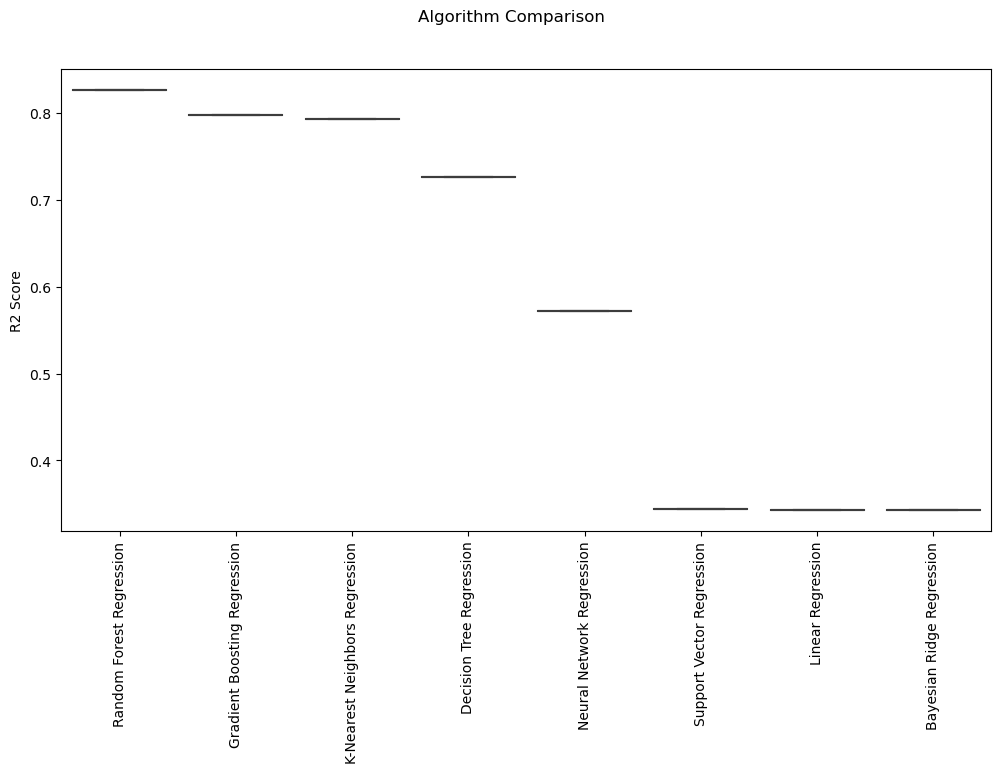

In [ ]:
#remove 'holiday', 
# Define the features and target variables
features = [ 'workingday', 'temp', 'hour', 'humidity', 'weather', 'season']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


# Plot the accuracy results of the models using seaborn boxplots
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models])
ax.set_ylabel('R2 Score')
ax.set_xticklabels([model[0] for model in top_models], rotation=90)
plt.show()


Random Forest Regression:
R2 Score: 0.8383085779491279
MSE: 371.5368277096141
MAE: 10.855229138381755

Gradient Boosting Regression:
R2 Score: 0.7891716209010301
MSE: 484.4444199207208
MAE: 12.82526460602944

Support Vector Regression:
R2 Score: 0.3646730771719864
MSE: 1459.8631545943401
MAE: 20.138785974715454

K-Nearest Neighbors Regression:
R2 Score: 0.7600327005472243
MSE: 551.400241657077
MAE: 12.671288837744532



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regression:
R2 Score: 0.7176018056699485
MSE: 648.8985497282573
MAE: 15.139602402464478

Linear Regression:
R2 Score: 0.4447455610203287
MSE: 1275.871473041299
MAE: 24.055080207217

Decision Tree Regression:
R2 Score: 0.7158245373392345
MSE: 652.9823819390625
MAE: 14.092882486711602

Bayesian Ridge Regression:
R2 Score: 0.4447355705897521
MSE: 1275.894429193436
MAE: 24.05174229385279

Random Forest Regression: 0.8383085779491279
Gradient Boosting Regression: 0.7891716209010301
K-Nearest Neighbors Regression: 0.7600327005472243
Neural Network Regression: 0.7176018056699485
Decision Tree Regression: 0.7158245373392345
Linear Regression: 0.4447455610203287
Bayesian Ridge Regression: 0.4447355705897521
Support Vector Regression: 0.3646730771719864


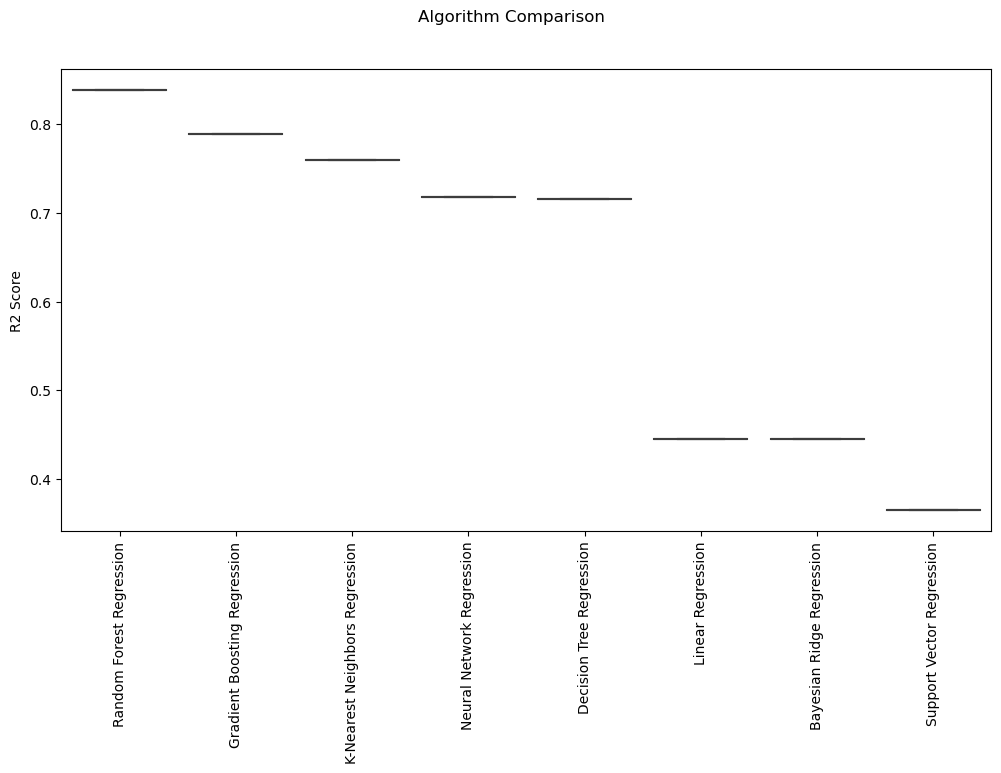

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models])
ax.set_ylabel('R2 Score')
ax.set_xticklabels([model[0] for model in top_models], rotation=90)
plt.show()


In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity', 'holiday']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Provide prediction for a specific scenario
        scenario_data = [[2, 1, 1, 25, 10, 70]]  # Example scenario data
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.8309495069034627
MSE: 5353.053400532693
MAE: 47.275711072506965

Feature Importance:
hour: 0.6094182581102582
temp: 0.17596198689675327
humidity: 0.08519764917763684
workingday: 0.05989022258742058
season: 0.03705849193555213
weather: 0.028491407117789913
holiday: 0.0039819841745891114




/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestRegressor is expecting 7 features as input.

2 corresponds to the season (e.g., 2 represents spring).
1 indicates whether it's a working day (1 means it is a working day).
1 represents the weather condition (e.g., 1 represents clear weather).
25 is the temperature in Celsius.
8 denotes the hour of the day.
70 is the humidity level.

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Provide prediction for a specific scenario
        scenario_data = [[2, 1, 1, 25, 10, 70]]  # Example scenario data
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.8121232099489827
MSE: 4147.224634386309
MAE: 40.64739347389441

Feature Importance:
hour: 0.5838314506396389
temp: 0.13696434268407617
workingday: 0.12076785613725471
humidity: 0.08680384758539103
season: 0.04208709933193039
weather: 0.029545403621708887


Predicted number of bikes for the scenario: 84.72666666666667



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Gradient Boosting Regression:
R2 Score: 0.7924889701791432
MSE: 4580.63422600651
MAE: 46.45887165484047

Feature Importance:
hour: 0.7116436455515925
workingday: 0.1388363286049326
temp: 0.07962989603823066
season: 0.04070553717066223
humidity: 0.016223700472059892
weather: 0.01296089216252205


Predicted number of bikes for the scenario: 53.29784763002309



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.27031908164829
MSE: 16107.102314277861
MAE: 75.64489776003354

Predicted number of bikes for the scenario: 66.17443205615993

K-Nearest Neighbors Regression:
R2 Score: 0.7912089256452308
MSE: 4608.890149597239
MAE: 44.04338319907941

Predicted number of bikes for the scenario: 148.2



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.4517338431052028
MSE: 12102.521612472588
MAE: 79.10403498103477

Predicted number of bikes for the scenario: -2641.8766496772064

Linear Regression:
R2 Score: 0.28190761882474524
MSE: 15851.294947962702
MAE: 90.83344335936057

Predicted number of bikes for the scenario: -6155.5792841876855

Decision Tree Regression:
R2 Score: 0.7142248946641563
MSE: 6308.248913670091
MAE: 48.62761178694723

Feature Importance:
hour: 0.6064340178246962
temp: 0.13406412848340513
workingday: 0.1072408439825203
humidity: 0.08499219128279747
season: 0.03910499766726614
weather: 0.028163820759314843


Predicted number of bikes for the scenario: 110.0

Bayesian Ridge Regression:
R2 Score: 0.2818928290963062
MSE: 15851.621418976507
MAE: 90.8300561131291

Predicted number of bikes for the scenario: -6125.033673260375

Random Forest Regression: 0.8121232099489827
Gradient Boosting Regression: 0.7924889701791432
K-Nearest Neighbors Regression: 0.7912089256452308
Decision Tre

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Provide prediction for a specific scenario
        scenario_data = [[2, 1, 1, 25, 10, 70]]  # Example scenario data
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for this scenerio: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.8236561283927133
MSE: 405.2054327432975
MAE: 11.141935856824738

Feature Importance:
hour: 0.39556029908920887
temp: 0.25691148091966276
workingday: 0.199787035115609
humidity: 0.10725562577898551
season: 0.025412954091105517
weather: 0.015072605005428164


Predicted number of bikes for this scenerio: 16.34



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Gradient Boosting Regression:
R2 Score: 0.7869227302320361
MSE: 489.6119525852609
MAE: 12.895973305969116

Feature Importance:
hour: 0.3606380779218796
workingday: 0.2999837457975941
temp: 0.2580129358375889
humidity: 0.06837052510252417
season: 0.00773299572107883
weather: 0.005261719619334302


Predicted number of bikes for this scenerio: 15.531190019250944



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.3689249218304378
MSE: 1450.0932060325786
MAE: 20.058530773562556

Predicted number of bikes for this scenerio: 2.6844242070354807

K-Nearest Neighbors Regression:
R2 Score: 0.7428208854607814
MSE: 590.9497928653625
MAE: 12.919735327963176

Predicted number of bikes for this scenerio: 17.6



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.7136212368814177
MSE: 658.0451567740248
MAE: 15.311471294094973

Predicted number of bikes for this scenerio: 1323.8124181689084

Linear Regression:
R2 Score: 0.44461346308915806
MSE: 1276.1750095287123
MAE: 24.04649356042794

Predicted number of bikes for this scenerio: -2262.5584304691724

Decision Tree Regression:
R2 Score: 0.7069456426718359
MSE: 673.3844312033407
MAE: 14.17505822236835

Feature Importance:
hour: 0.39557509837972726
temp: 0.2529608030165892
workingday: 0.20215735433723558
humidity: 0.1063878212940301
season: 0.026756904591007866
weather: 0.016162018381410168


Predicted number of bikes for this scenerio: 8.0

Bayesian Ridge Regression:
R2 Score: 0.4446024176508111
MSE: 1276.2003898925684
MAE: 24.043604532157847

Predicted number of bikes for this scenerio: -2259.587814118705

Random Forest Regression: 0.8236561283927133
Gradient Boosting Regression: 0.7869227302320361
K-Nearest Neighbors Regression: 0.7428208854607814
Neural N

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
#Peak hours
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Filter the data for peak hours 
peak_hours = [ 8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 1, 1, 25, 8, 70]]  # Example scenario data during peak hours
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.6852987234497183
MSE: 15595.813112946253
MAE: 94.74581037711097

Predicted number of bikes for the scenario during peak hours: 506.66900000000004

Gradient Boosting Regression:
R2 Score: 0.7376964086936315
MSE: 12999.114060521262
MAE: 91.64731265667102

Predicted number of bikes for the scenario during peak hours: 148.76426495976713



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.09434697039219042
MSE: 44881.91325363194
MAE: 173.62877392528995

Predicted number of bikes for the scenario during peak hours: 330.571882212162

K-Nearest Neighbors Regression:
R2 Score: 0.6407699814530268
MSE: 17802.54689536878
MAE: 104.4943396226415

Predicted number of bikes for the scenario during peak hours: 241.8



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.41337978152966115
MSE: 29071.440052062655
MAE: 136.9296787224533

Predicted number of bikes for the scenario during peak hours: 990.9661696679669

Linear Regression:
R2 Score: 0.5104663958763225
MSE: 24260.068742365118
MAE: 123.1551183312445

Predicted number of bikes for the scenario during peak hours: 3496.524521072668

Decision Tree Regression:
R2 Score: 0.5043006432561128
MSE: 24565.628117972177
MAE: 112.67329902801602

Predicted number of bikes for the scenario during peak hours: 355.0

Bayesian Ridge Regression:
R2 Score: 0.5103861149969279
MSE: 24264.04726321926
MAE: 123.1513321804024

Predicted number of bikes for the scenario during peak hours: 3475.9843690689545

Gradient Boosting Regression: 0.7376964086936315
Random Forest Regression: 0.6852987234497183
K-Nearest Neighbors Regression: 0.6407699814530268
Linear Regression: 0.5104663958763225
Bayesian Ridge Regression: 0.5103861149969279
Decision Tree Regression: 0.5043006432561128
Neura

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
#Peak hours
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Filter the data for peak hours 
peak_hours = [ 8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 1, 1, 25, 8, 70]]  # Example scenario data during peak hours
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.6893399195992868
MSE: 12842.739357708513
MAE: 85.5138910589601

Predicted number of bikes for the scenario during peak hours: 459.3383333333333

Gradient Boosting Regression:
R2 Score: 0.7370349114896189
MSE: 10871.020465710988
MAE: 84.09934621509306

Predicted number of bikes for the scenario during peak hours: 139.201719028174



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.03598820305137429
MSE: 39852.407911560564
MAE: 160.92434636922994

Predicted number of bikes for the scenario during peak hours: 274.4617874324322

K-Nearest Neighbors Regression:
R2 Score: 0.6495856041617072
MSE: 14486.189365351627
MAE: 93.40514579759864

Predicted number of bikes for the scenario during peak hours: 216.8



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.4437179825853319
MSE: 22996.791058000537
MAE: 120.07065849244758

Predicted number of bikes for the scenario during peak hours: 1188.0683366351454

Linear Regression:
R2 Score: 0.5179094659813152
MSE: 19929.702803251654
MAE: 111.1683852447787

Predicted number of bikes for the scenario during peak hours: 2630.7225732019187

Decision Tree Regression:
R2 Score: 0.5218618341571625
MSE: 19766.311245950066
MAE: 99.54473985134362

Predicted number of bikes for the scenario during peak hours: 358.0

Bayesian Ridge Regression:
R2 Score: 0.5179063631320973
MSE: 19929.83107555404
MAE: 111.14380430853937

Predicted number of bikes for the scenario during peak hours: 2607.1022336891588

Gradient Boosting Regression: 0.7370349114896189
Random Forest Regression: 0.6893399195992868
K-Nearest Neighbors Regression: 0.6495856041617072
Decision Tree Regression: 0.5218618341571625
Linear Regression: 0.5179094659813152
Bayesian Ridge Regression: 0.5179063631320973
Neu

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Filter the data for peak hours 
peak_hours = [ 8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 1, 1, 25, 8, 70]]  # Example scenario data during peak hours
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.6983815257005739
MSE: 670.1343304706231
MAE: 15.858628048433367

Predicted number of bikes for the scenario during peak hours: 22.948499999999996

Gradient Boosting Regression:
R2 Score: 0.749746157206119
MSE: 556.0126639387919
MAE: 15.252894517720872

Predicted number of bikes for the scenario during peak hours: -19.977055971972252



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.19213018626748746
MSE: 1794.9208780746565
MAE: 27.01658987397612

Predicted number of bikes for the scenario during peak hours: 29.63592165949396

K-Nearest Neighbors Regression:
R2 Score: 0.6491037567539903
MSE: 779.6194168096055
MAE: 17.180445969125216

Predicted number of bikes for the scenario during peak hours: 25.0



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.531602788503686
MSE: 1040.682446423297
MAE: 21.950454270699463

Predicted number of bikes for the scenario during peak hours: 432.81639730480595

Linear Regression:
R2 Score: 0.5183088541846563
MSE: 1070.2188393610832
MAE: 22.80919033709176

Predicted number of bikes for the scenario during peak hours: 865.8019478707615

Decision Tree Regression:
R2 Score: 0.47157853034733466
MSE: 1174.0440256336954
MAE: 19.987106918238993

Predicted number of bikes for the scenario during peak hours: 20.5

Bayesian Ridge Regression:
R2 Score: 0.5180801866501458
MSE: 1070.7268916794817
MAE: 22.805552381278368

Predicted number of bikes for the scenario during peak hours: 864.838615068956

Gradient Boosting Regression: 0.749746157206119
Random Forest Regression: 0.6983815257005739
K-Nearest Neighbors Regression: 0.6491037567539903
Neural Network Regression: 0.531602788503686
Linear Regression: 0.5183088541846563
Bayesian Ridge Regression: 0.5180801866501458
Decisio

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Filter the data for peak hours 
peak_hours = [ 8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70]]  # Example scenario data during peak hours
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.6875130213784777
MSE: 694.2819158730827
MAE: 15.925189592568664

Predicted number of bikes for the scenario during peak hours: 19.977999999999998

Gradient Boosting Regression:
R2 Score: 0.749746157206119
MSE: 556.0126639387918
MAE: 15.252894517720875

Predicted number of bikes for the scenario during peak hours: -12.330674326005324



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.19213018626748746
MSE: 1794.9208780746565
MAE: 27.01658987397612

Predicted number of bikes for the scenario during peak hours: 29.63592165949396

K-Nearest Neighbors Regression:
R2 Score: 0.6491037567539903
MSE: 779.6194168096055
MAE: 17.180445969125216

Predicted number of bikes for the scenario during peak hours: 10.8



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.5366926257296886
MSE: 1029.3738730026066
MAE: 21.741395556878974

Predicted number of bikes for the scenario during peak hours: 220.0799200481939

Linear Regression:
R2 Score: 0.5183088541846563
MSE: 1070.2188393610832
MAE: 22.80919033709176

Predicted number of bikes for the scenario during peak hours: 862.034796829259

Decision Tree Regression:
R2 Score: 0.47342150925777093
MSE: 1169.9493048408613
MAE: 20.015122927387075

Predicted number of bikes for the scenario during peak hours: 26.0

Bayesian Ridge Regression:
R2 Score: 0.5180801866501458
MSE: 1070.7268916794817
MAE: 22.805552381278368

Predicted number of bikes for the scenario during peak hours: 861.0531613771002

Gradient Boosting Regression: 0.749746157206119
Random Forest Regression: 0.6875130213784777
K-Nearest Neighbors Regression: 0.6491037567539903
Neural Network Regression: 0.5366926257296886
Linear Regression: 0.5183088541846563
Bayesian Ridge Regression: 0.5180801866501458
Decis

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70], [3, 1, 2, 25, 17, 70], [3, 1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][4]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.7446876654888813
MSE: 650.6249909220447
MAE: 15.3328620464204

Predicted number of bikes for the scenario during peak hours (Hour: 8): 25.34357142857143

Predicted number of bikes for the scenario during peak hours (Hour: 17): 35.71

Predicted number of bikes for the scenario during peak hours (Hour: 18): 31.5

Gradient Boosting Regression:
R2 Score: 0.7679507149613507
MSE: 591.3426167240783
MAE: 15.079312912204188

Predicted number of bikes for the scenario during peak hours (Hour: 8): -23.105010508242753

Predicted number of bikes for the scenario during peak hours (Hour: 17): 3.275052207118833

Predicted number of bikes for the scenario during peak hours (Hour: 18): -24.583964145480902



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.1822476569242253
MSE: 2083.9185533630625
MAE: 29.604628487917218

Predicted number of bikes for the scenario during peak hours (Hour: 8): 31.85662680864338

Predicted number of bikes for the scenario during peak hours (Hour: 17): 31.856626808643817

Predicted number of bikes for the scenario during peak hours (Hour: 18): 31.85662680864384

K-Nearest Neighbors Regression:
R2 Score: 0.6837320487257661
MSE: 805.9611899313501
MAE: 16.606864988558353

Predicted number of bikes for the scenario during peak hours (Hour: 8): 13.4

Predicted number of bikes for the scenario during peak hours (Hour: 17): 9.6

Predicted number of bikes for the scenario during peak hours (Hour: 18): 10.4



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.4932682508082653
MSE: 1291.3294625936935
MAE: 24.546428669114533

Predicted number of bikes for the scenario during peak hours (Hour: 8): 0.5014129180011972

Predicted number of bikes for the scenario during peak hours (Hour: 17): 40.134689063381614

Predicted number of bikes for the scenario during peak hours (Hour: 18): 44.539929527438844

Linear Regression:
R2 Score: 0.5318246338611436
MSE: 1193.074333550277
MAE: 23.373014770689934

Predicted number of bikes for the scenario during peak hours (Hour: 8): 808.138614191558

Predicted number of bikes for the scenario during peak hours (Hour: 17): 832.5678625841795

Predicted number of bikes for the scenario during peak hours (Hour: 18): 835.282223516693

Decision Tree Regression:
R2 Score: 0.5883137409422228
MSE: 1049.1203610475466
MAE: 20.360030511060256

Predicted number of bikes for the scenario during peak hours (Hour: 8): 15.0

Predicted number of bikes for the scenario during peak hours (Hour

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70], [3, 1, 2, 25, 17, 70], [3, 1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][4]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.6586165379857474
MSE: 15644.872205071422
MAE: 94.1973685663434

Predicted number of bikes for the scenario during peak hours (Hour: 8): 382.65433333333334

Predicted number of bikes for the scenario during peak hours (Hour: 17): 385.921

Predicted number of bikes for the scenario during peak hours (Hour: 18): 365.241

Gradient Boosting Regression:
R2 Score: 0.7242024408201406
MSE: 12639.210881455594
MAE: 89.94814452416318

Predicted number of bikes for the scenario during peak hours (Hour: 8): 91.82439864639173

Predicted number of bikes for the scenario during peak hours (Hour: 17): 98.24024045164042

Predicted number of bikes for the scenario during peak hours (Hour: 18): 92.36578459068241



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.021859298968798013
MSE: 44826.09138685588
MAE: 183.6892054781583

Predicted number of bikes for the scenario during peak hours (Hour: 8): 356.89082655906697

Predicted number of bikes for the scenario during peak hours (Hour: 17): 356.89082655906685

Predicted number of bikes for the scenario during peak hours (Hour: 18): 356.89082655906685

K-Nearest Neighbors Regression:
R2 Score: 0.6441885418175338
MSE: 16306.076338672767
MAE: 101.40686498855835

Predicted number of bikes for the scenario during peak hours (Hour: 8): 261.6

Predicted number of bikes for the scenario during peak hours (Hour: 17): 153.8

Predicted number of bikes for the scenario during peak hours (Hour: 18): 161.4



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.3470084149825323
MSE: 29925.20445574133
MAE: 144.54216355195155

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2926.4814637851464

Predicted number of bikes for the scenario during peak hours (Hour: 17): 2992.762569108633

Predicted number of bikes for the scenario during peak hours (Hour: 18): 2999.7112198984423

Linear Regression:
R2 Score: 0.6289513739233945
MSE: 17004.363077768157
MAE: 107.51683442513185

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1103.2428733323693

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1090.2484902873937

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1088.804669949063

Decision Tree Regression:
R2 Score: 0.4548979980982826
MSE: 24980.85615560641
MAE: 116.06605644546148

Predicted number of bikes for the scenario during peak hours (Hour: 8): 326.0

Predicted number of bikes for the scenario during peak hours (H

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70], [3, 1, 2, 25, 17, 70], [3, 1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][4]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.6445140192726018
MSE: 19188.566279650015
MAE: 106.123570802005

Predicted number of bikes for the scenario during peak hours (Hour: 8): 361.56733333333335

Predicted number of bikes for the scenario during peak hours (Hour: 17): 380.269

Predicted number of bikes for the scenario during peak hours (Hour: 18): 362.664

Gradient Boosting Regression:
R2 Score: 0.71705585641291
MSE: 15272.873606858488
MAE: 100.00935965830055

Predicted number of bikes for the scenario during peak hours (Hour: 8): 97.06017169753878

Predicted number of bikes for the scenario during peak hours (Hour: 17): 78.67162751933881

Predicted number of bikes for the scenario during peak hours (Hour: 18): 84.67963611544018



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.03115950112528676
MSE: 52296.464938016004
MAE: 196.63949092463628

Predicted number of bikes for the scenario during peak hours (Hour: 8): 409.74945681691145

Predicted number of bikes for the scenario during peak hours (Hour: 17): 409.74945681691185

Predicted number of bikes for the scenario during peak hours (Hour: 18): 409.7494568169119

K-Nearest Neighbors Regression:
R2 Score: 0.6345976282040757
MSE: 19723.837254004575
MAE: 112.41281464530891

Predicted number of bikes for the scenario during peak hours (Hour: 8): 275.0

Predicted number of bikes for the scenario during peak hours (Hour: 17): 163.4

Predicted number of bikes for the scenario during peak hours (Hour: 18): 171.8



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.32168815660453287
MSE: 36614.191475659325
MAE: 159.5573975958512

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2458.5507238631853

Predicted number of bikes for the scenario during peak hours (Hour: 17): 2557.0157930529385

Predicted number of bikes for the scenario during peak hours (Hour: 18): 2567.956356296244

Linear Regression:
R2 Score: 0.5981900217853885
MSE: 21689.061782462457
MAE: 120.35354682559374

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1911.3814875239418

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1922.8163528715863

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1924.0868934657697

Decision Tree Regression:
R2 Score: 0.4223300194178208
MSE: 31181.70423340961
MAE: 128.38558352402745

Predicted number of bikes for the scenario during peak hours (Hour: 8): 355.0

Predicted number of bikes for the scenario during peak hours 

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
#K-fold validation:

from sklearn.model_selection import cross_val_score

# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Prepare the data
X = Bike_Sharing_hour[features]
y = Bike_Sharing_hour[target]

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Perform k-fold cross-validation for each regression model
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'{name}:')
    print(f'R2 Scores: {scores}')
    print(f'Mean R2 Score: {scores.mean()}\n')


Random Forest Regression:
R2 Scores: [0.49695957 0.60683799 0.46655178 0.67869773 0.74852964]
Mean R2 Score: 0.5995153421269572

Gradient Boosting Regression:
R2 Scores: [0.66854393 0.65089312 0.511247   0.67487127 0.74072467]
Mean R2 Score: 0.6492559946908615

Support Vector Regression:
R2 Scores: [0.32167059 0.37385862 0.10207849 0.03320163 0.32179533]
Mean R2 Score: 0.23052093286275738

K-Nearest Neighbors Regression:
R2 Scores: [0.30302075 0.58491713 0.39259026 0.64880103 0.72351437]
Mean R2 Score: 0.5305687077282858



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regression:
R2 Scores: [0.58927745 0.58537404 0.2327855  0.56256735 0.65692047]
Mean R2 Score: 0.525384964517168

Linear Regression:
R2 Scores: [ 0.25143788  0.2924537  -0.05494906  0.33441353  0.39800774]
Mean R2 Score: 0.24427275686456743

Decision Tree Regression:
R2 Scores: [0.18850786 0.41221889 0.15145067 0.57850752 0.65554795]
Mean R2 Score: 0.397246579339363

Bayesian Ridge Regression:
R2 Scores: [ 0.25172416  0.29288514 -0.05476661  0.33425334  0.39796791]
Mean R2 Score: 0.2444127892597745



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: Can only use .dt accessor with datetimelike values

#combined features to your dataset, you provide the model with additional information that can potentially improve its performance in predicting the number of bikes per day. However, keep in mind that the effectiveness of these combinations may vary depending on the specific dataset and problem you are working with. It's important to experiment and evaluate the impact of these combined features on your model's performance.

In [ ]:
from sklearn.ensemble import VotingRegressor


# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Prepare the data
X = Bike_Sharing_hour[features]
y = Bike_Sharing_hour[target]

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Initialize an empty list to store the individual regression models
individual_models = []

# Train and store the individual regression models
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Append the trained model to the list
    individual_models.append((name, model))

# Create the ensemble model using model averaging
ensemble_model = VotingRegressor(estimators=individual_models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

# Calculate the performance metrics for the ensemble model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the scores for the ensemble model
print('Ensemble Model (Model Averaging):')
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble Model (Model Averaging):
R2 Score: 0.6428946020112691
MSE: 19275.979840629
MAE: 116.47525469775624


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In the above code, we initialize an empty list individual_models to store the individual regression models. Then, we train each model separately using the training data and store them in the list. Finally, we create the ensemble model using VotingRegressor from scikit-learn, passing the list of individual models as the estimators parameter. The ensemble model is then trained on the training data and used to make predictions on the test data. The performance metrics for the ensemble model are calculated and printed.

In [ ]:



# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Prepare the data
X = Bike_Sharing_hour[features]
y = Bike_Sharing_hour[target]

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Initialize an empty list to store the individual regression models
individual_models = []

# Train and store the individual regression models
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Append the trained model to the list
    individual_models.append((name, model))

# Create the ensemble model using model averaging
ensemble_model = VotingRegressor(estimators=individual_models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

# Calculate the performance metrics for the ensemble model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the scores for the ensemble model
print('Ensemble Model (Model Averaging):')
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble Model (Model Averaging):
R2 Score: 0.6500210364703076
MSE: 18891.306274388688
MAE: 115.09029108380213


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'  # Assuming 'total' represents the number of bikes rented per day

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Create a list to store the predictions from each model
all_predictions = []

# Fit and predict using each model
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Add the predictions to the list
    all_predictions.append(y_pred)

# Take the average of all predictions
ensemble_predictions = np.mean(all_predictions, axis=0)

# Calculate the evaluation metrics for the ensemble predictions
r2 = r2_score(y_test, ensemble_predictions)
mse = mean_squared_error(y_test, ensemble_predictions)
mae = mean_absolute_error(y_test, ensemble_predictions)

# Print the evaluation metrics
print("Ensemble Model (Model Averaging):")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Provide bike predictions for a specific scenario
scenario_data = [[2, 1, 1, 25, 8, 70]]  # Example scenario data
scenario_prediction = np.mean([model.predict(scenario_data) for model in models])
print(f"Predicted number of bikes for the scenario: {scenario_prediction}")


Ensemble Model (Model Averaging):
R2 Score: 0.735587911757243
MSE: 8372.717536538392
MAE: 61.89758054780712


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: 'tuple' object has no attribute 'predict'

#Hyperparameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'  # Assuming 'total' represents the number of bikes rented per day


# Define the hyperparameters for each model
model_hyperparameters = {
    'Random Forest Regression': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting Regression': {
        'learning_rate': [0.1, 0.05, 0.01],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 10]
    },
    'Support Vector Regression': {
        'kernel': ['linear', 'rbf'],
        'C': [1, 10, 100]
    },
    # Add hyperparameters for other models
}

# Perform hyperparameter tuning for each model
for name, model in models:
    if name in model_hyperparameters:
        # Define the parameter grid for the model
        param_grid = model_hyperparameters[name]

        # Create GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)

        # Fit the GridSearchCV object on the training data
        grid_search.fit(X_train, y_train)

        # Print the best hyperparameters and score
        print(f"Best hyperparameters for {name}:")
        print(grid_search.best_params_)
        print(f"Best score: {grid_search.best_score_}\n")

        # Update the model with the best hyperparameters
        best_model = grid_search.best_estimator_
        models.append((name + ' (Tuned)', best_model))


Best hyperparameters for Random Forest Regression:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.8370287305917434

Best hyperparameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best score: 0.8459255171344584

Best hyperparameters for Support Vector Regression:
{'C': 100, 'kernel': 'rbf'}
Best score: 0.47819439472558384



#Now let's try to predict rides per variable.

In [ ]:
# Define the features and target variables
features = [ 'weather', 'temp', 'humidity']
target = 'total'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70], [3, 1, 2, 25, 17, 70], [3, 1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][4]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.17839457456845853
MSE: 44348.95049687706
MAE: 168.54178106894372



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestRegressor is expecting 3 features as input.